In [7]:
import sys
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

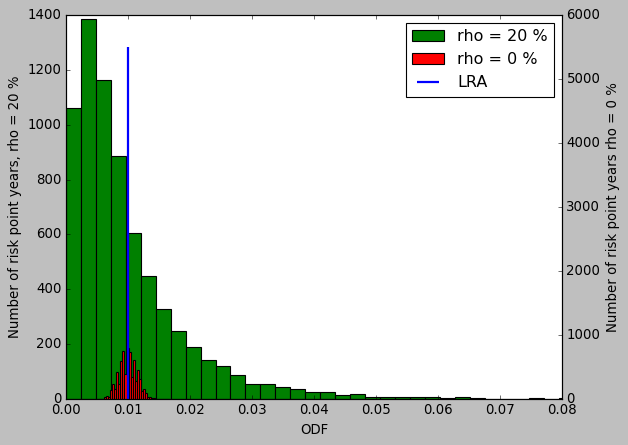

In [22]:
#Initilize variables
seed = 1
rho = 0.1
p = 0.01
ant_year = 7000
ant_cust = 5000
binwidth = 0.005
loss_lim = norm.ppf(p)

#Correlated portolio
np.random.seed(seed)
systematic_factor = np.random.normal(size=(ant_year))
idiosyncratic_factor = np.random.normal(size=(ant_cust,ant_year))
asset = np.sqrt(rho)*systematic_factor + np.sqrt(1-rho)*idiosyncratic_factor
port_loss =  asset<loss_lim
loss_rates_sim =np.sum(port_loss,axis=0)/ant_cust

#Uncorrelated porfolio
port_loss_ucorr = idiosyncratic_factor<loss_lim
loss_rates_sim_ucorr =np.sum(port_loss_ucorr,axis=0)/ant_cust

#Plot distribution
plt.style.use('classic')
fig, ax_left = plt.subplots()
ax_left.hist(loss_rates_sim,bins=int(ant_year*binwidth),color='g',label='rho = 20 %')
ax_left.set_xlabel('ODF')
ax_left.set_ylabel('Number of risk point years, rho = 20 %')
ax_right = ax_left.twinx()
ax_right.set_ylabel('Number of risk point years rho = 0 %')
ax_right.hist(loss_rates_sim_ucorr,bins=int(ant_year*binwidth),color='r',label='rho = 0 %')
ax_right.vlines(p,0,ant_cust*1.1,color='blue',label='LRA',linestyles = 'solid',lw=2)
ax_right.set_xlim([0,0.08])
h1, l1 = ax_left.get_legend_handles_labels()
h2, l2 = ax_right.get_legend_handles_labels()
legend = ax_left.legend(h1+h2, l1+l2, loc=1)


In [24]:
plt.show()

In [25]:
fig.savefig('test.pdf')
fig.savefig('test.png')
fig.savefig('test.svg')



0.009893342857142858
0.009978457142857142



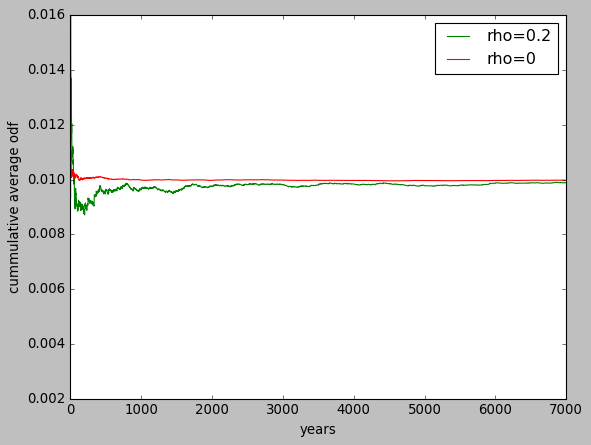

In [28]:
#Running mean for both portefolio
d = {'corr':loss_rates_sim,'uncorr':loss_rates_sim_ucorr}
df = pd.DataFrame(d)
df_mean = df.expanding().mean()

plt.style.use('classic')

fig, ax = plt.subplots()
ax.plot(df_mean['corr'],color='g',label='rho=0.2')
plt.xlabel('years')
plt.ylabel('cummulative average odf')
ax.plot(df_mean['uncorr'],color='r',label='rho=0')
#plt.ylim([0.028,0.034])
# plt.xlim([0,199])
plt.legend()
print(np.mean(loss_rates_sim))
print(np.mean(loss_rates_sim_ucorr))

print()

fig.savefig('test_mean.svg')


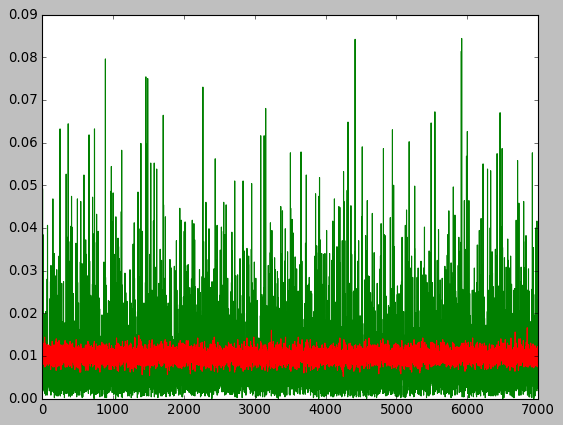

In [29]:
plt.plot(loss_rates_sim,color='g')
plt.plot(loss_rates_sim_ucorr,color='r')